<a href="https://colab.research.google.com/github/CardosoJr/bootcamp/blob/main/Labs/Project_Simul/AAB_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulando projeto integrado 2

Teste AAB

[Conjunto de Dados](https://www.kaggle.com/datasets/samtyagi/audacity-ab-testing).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})

# 1.

In [ ]:
data = pd.read_csv("homepage_actions.csv")

In [ ]:
data.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [ ]:
data["action"].unique()

array(['view', 'click'], dtype=object)

In [ ]:
data.shape

(8188, 4)

# Solução

# 2.

In [ ]:
data = data.rename(columns={"group": "experiment_group", "action": "event_name", "id": "user_id"})
data.columns

Index(['timestamp', 'user_id', 'experiment_group', 'event_name'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   timestamp         8188 non-null   object
 1   user_id           8188 non-null   int64 
 2   experiment_group  8188 non-null   object
 3   event_name        8188 non-null   object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


In [ ]:
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [ ]:
data["date"] = pd.to_datetime(data["timestamp"].values.astype(dtype='datetime64[D]'))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         8188 non-null   datetime64[ns]
 1   user_id           8188 non-null   int64         
 2   experiment_group  8188 non-null   object        
 3   event_name        8188 non-null   object        
 4   date              8188 non-null   datetime64[s] 
dtypes: datetime64[ns](1), datetime64[s](1), int64(1), object(2)
memory usage: 320.0+ KB


# 3.

In [ ]:
print(f"""
Quantidade de eventos: {len(data)}
Eventos por tipo: {data.groupby("event_name")["user_id"].count()}
Usuários únicos: {data["user_id"].nunique()}
Média de eventos por usuário: {round(len(data) / data["user_id"].nunique(), 4)}
""")


Quantidade de eventos: 8188
Eventos por tipo: event_name
click    1860
view     6328
Name: user_id, dtype: int64
Usuários únicos: 6328
Média de eventos por usuário: 1.2939



In [ ]:
print(f"""
Data mínima: {data["date"].min()}
Data máxima: {data["date"].max()}
""")


Data mínima: 2016-09-24 00:00:00
Data máxima: 2017-01-18 00:00:00



In [ ]:
data.columns

Index(['timestamp', 'user_id', 'experiment_group', 'event_name', 'date'], dtype='object')

In [ ]:
data.head()

,timestamp,user_id,experiment_group,event_name,date
0,2016-09-24 17:42:27.839496,804196,experiment,view,2016-09-24
1,2016-09-24 19:19:03.542569,434745,experiment,view,2016-09-24
2,2016-09-24 19:36:00.944135,507599,experiment,view,2016-09-24
3,2016-09-24 19:59:02.646620,671993,control,view,2016-09-24
4,2016-09-24 20:26:14.466886,536734,experiment,view,2016-09-24


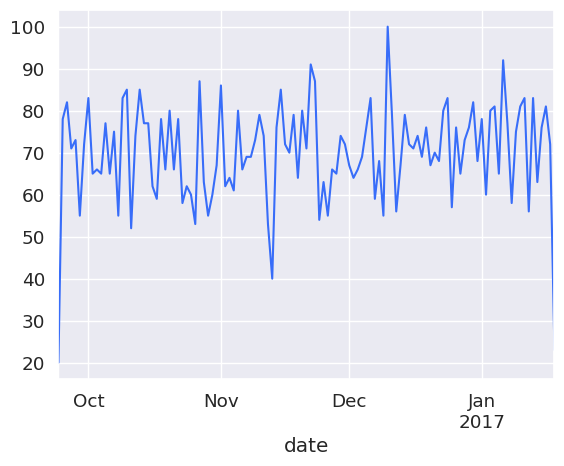

In [ ]:
data.groupby("date")["user_id"].count().plot()
plt.show()

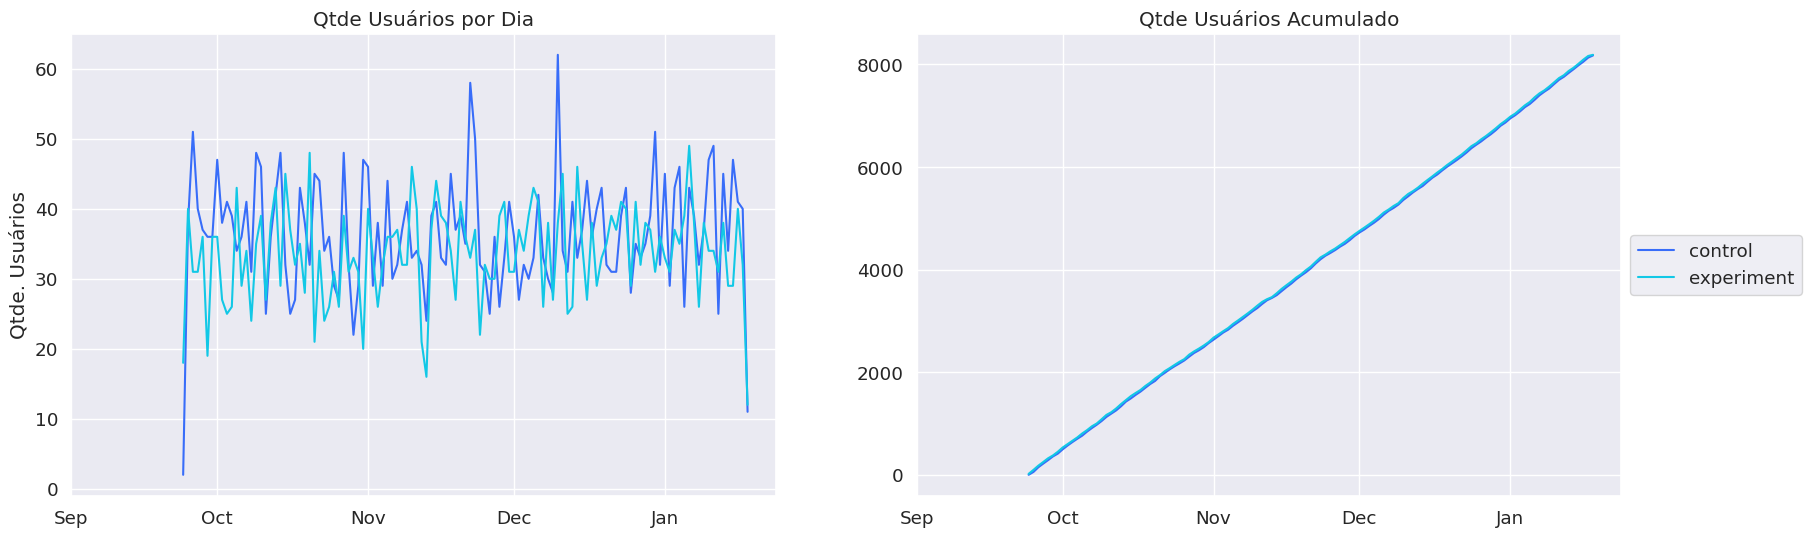

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (20, 6))

sns.lineplot(x = 'date',
             y = 'user_id',
             hue = 'experiment_group',
             data = data.groupby(["date", 'experiment_group'])["user_id"].count().reset_index(),
             ax = ax[0]);

sns.lineplot(x = 'date',
             y = 'user_id',
             hue = 'experiment_group',
             data = data.groupby(["date", 'experiment_group'])["user_id"].count().cumsum().reset_index(),
             ax = ax[1]);

[plot.set_xlabel("") for plot in ax]

ax[0].set_ylabel("Qtde. Usuários")
ax[1].set_ylabel("")

ax[0].set_title("Qtde Usuários por Dia")
ax[1].set_title("Qtde Usuários Acumulado");

ax[0].get_legend().remove()
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5));

ax[0].set_xticks(data['date'].dt.to_period('M').drop_duplicates().dt.to_timestamp())
ax[1].set_xticks(data['date'].dt.to_period('M').drop_duplicates().dt.to_timestamp())

ax[0].set_xticklabels(data['date'].dt.strftime('%b').unique())
ax[1].set_xticklabels(data['date'].dt.strftime('%b').unique());

In [ ]:
filtered_data = data.loc[data["date"] > "2016-11-01"]

In [ ]:
print(f"""
Proporção de usuarios que permanecem: {100*round(filtered_data["user_id"].nunique() / data["user_id"].nunique(), 3)}
Proporção de usuarios que eliminamos: {100*round(1 - filtered_data["user_id"].nunique() / data["user_id"].nunique(), 3)}
""")


Proporção de usuarios que permanecem: 67.4
Proporção de usuarios que eliminamos: 32.6



In [ ]:
filtered_data.groupby("experiment_group")["user_id"].count()

experiment_group
control       2836
experiment    2677
Name: user_id, dtype: int64

# 4.

In [ ]:
data.groupby("event_name")["user_id"].count().sort_values(ascending=False)

event_name
view     6328
click    1860
Name: user_id, dtype: int64

In [ ]:
data.groupby("event_name")["user_id"].nunique()

event_name
click    1860
view     6328
Name: user_id, dtype: int64

In [ ]:
data.groupby("event_name")["user_id"].nunique() / data["user_id"].nunique()

event_name
click    0.293932
view     1.000000
Name: user_id, dtype: float64

In [ ]:
users_by_event = data.groupby("event_name")["user_id"].nunique().sort_values(ascending=False).reset_index()
users_by_event["users_in_previous_step"] = users_by_event["user_id"].shift(1)
users_by_event["conversion_previous_step"] = users_by_event["user_id"] / users_by_event["users_in_previous_step"]
users_by_event["dropoff_rate"] = 1 - users_by_event["conversion_previous_step"]

users_by_event.head()

,event_name,user_id,users_in_previous_step,conversion_previous_step,dropoff_rate
0,view,6328,NaN,NaN,NaN
1,click,1860,6328.0,0.293932,0.706068


# 5.

Abaixo estamos só transformando o grupo controle em dois artificialmente, pois este dataset é na realidade um Teste A/B. Logo, para transformá-lo em um AAB estamos associando amostras do grupo controle aos grupos Controle_1 e Controle_2 de forma aleatória.

In [ ]:
np.random.seed(200)

data["unif"] = np.random.uniform(0, 1, len(data))
data["control_divided"] = np.where(
    (data["experiment_group"] == "control") & (data["unif"] > 0.50),
    ["control_1"] * len(data),
    ["control_2"] * len(data)
)

data["experiment_group"] = np.where(
    data["experiment_group"] == "experiment",
    data["experiment_group"],
    data["control_divided"]
)

data.groupby("experiment_group")["user_id"].nunique()

experiment_group
control_1     1850
control_2     1957
experiment    2996
Name: user_id, dtype: int64

In [ ]:
data.head()

,timestamp,user_id,experiment_group,event_name,date,unif,control_divided
0,2016-09-24 17:42:27.839496,804196,experiment,view,2016-09-24,0.947632,control_2
1,2016-09-24 19:19:03.542569,434745,experiment,view,2016-09-24,0.226547,control_2
2,2016-09-24 19:36:00.944135,507599,experiment,view,2016-09-24,0.594420,control_2
3,2016-09-24 19:59:02.646620,671993,control_2,view,2016-09-24,0.428309,control_2
4,2016-09-24 20:26:14.466886,536734,experiment,view,2016-09-24,0.764141,control_2


In [ ]:
conversions = data[["user_id", "experiment_group"]].drop_duplicates()

converted = pd.DataFrame(data={
    "user_id": data[data["event_name"] == "click"]["user_id"].unique(),
    "converted": 1
})

conversions = conversions.merge(converted, on="user_id", how="left")
conversions["converted"] = conversions["converted"].fillna(0)

conversions.head(10)

,user_id,experiment_group,converted
0,804196,experiment,0.0
1,434745,experiment,0.0
2,507599,experiment,0.0
3,671993,control_2,0.0
4,536734,experiment,0.0
5,681598,experiment,0.0
6,522116,experiment,0.0
7,349125,experiment,1.0
8,560027,control_1,0.0
9,265695,experiment,0.0


In [ ]:
data["group"] = np.where(
    (data["experiment_group"] == "control_1") | (data["experiment_group"] == "control_2"),
    ["control"] * len(data),
    ["experiment"] * len(data)
)

In [ ]:
from scipy.stats import ttest_ind

statistic, pvalue = ttest_ind(
    conversions[conversions["experiment_group"] == "control_1"]["converted"],
    conversions[conversions["experiment_group"] == "control_2"]["converted"]
)

print(f"""
Statistic: {statistic}
p-value: {pvalue}
""")


Statistic: 0.4884643814837724
p-value: 0.6252490978110155



In [ ]:
conversions.groupby("experiment_group")["converted"].mean()

experiment_group
control_1     0.373514
control_2     0.365866
experiment    0.309746
Name: converted, dtype: float64

In [ ]:
def t_test(df, group1, group2, event, group_col="experiment_group"):

  conversions = df[["user_id", group_col]].drop_duplicates()

  converted = pd.DataFrame(data={
      "user_id": df[df["event_name"] == event]["user_id"].unique(),
      "converted": 1
  })

  conversions = conversions.merge(converted, on="user_id", how="left")
  conversions["converted"] = conversions["converted"].fillna(0)

  statistic, pvalue = ttest_ind(
      conversions[conversions[group_col] == group1]["converted"],
      conversions[conversions[group_col] == group2]["converted"]
  )

  return statistic, pvalue

In [ ]:
data.head()

,timestamp,user_id,experiment_group,event_name,date,unif,control_divided,group
0,2016-09-24 17:42:27.839496,804196,experiment,view,2016-09-24,0.947632,control_2,experiment
1,2016-09-24 19:19:03.542569,434745,experiment,view,2016-09-24,0.226547,control_2,experiment
2,2016-09-24 19:36:00.944135,507599,experiment,view,2016-09-24,0.594420,control_2,experiment
3,2016-09-24 19:59:02.646620,671993,control_2,view,2016-09-24,0.428309,control_2,control
4,2016-09-24 20:26:14.466886,536734,experiment,view,2016-09-24,0.764141,control_2,experiment


In [ ]:
events = ["click"]

print("Running A/A tests...")
for event in events:
  _, pvalue = t_test(data, "control_2", "control_1", event)

  print(f"""
  Event: {event}
  p-value: {pvalue}
  """)
  print()

Running A/A tests...

  Event: click
  p-value: 0.6252490978110155
  



In [ ]:
events = ["click"]
controls = ["control_1", "control_2"]

print("Running A/B tests...")
print()
for event in events:

  print(f"Event: {event}")

  for control in controls:

    _, pvalue = t_test(data, control, "experiment", event)

    print(f"""
    Comparison: {control} vs. experiment
    p-value: {pvalue}
    """)

  _, pvalue = t_test(data, "control", "experiment", event, group_col="group")

  print(f"""
  Comparison: all control vs. experiment
  p-value: {pvalue}
  """)

Running A/B tests...

Event: click

    Comparison: control_1 vs. experiment
    p-value: 4.74094556747289e-06
    

    Comparison: control_2 vs. experiment
    p-value: 4.082409476299313e-05
    

  Comparison: all control vs. experiment
  p-value: 0.008825098914958293
  


Quando fazemos múltiplos testes estatísticos em sequência, temos que nos cuidar com o aumento da probabilidade de falso positivo. Portanto, é importante aplicar algum tipo de correção. Abaixo estamos aplicando a correção de bonferroni

In [ ]:
from scipy.stats import false_discovery_control

In [ ]:
pvalores = [4.74094556747289e-06, 4.082409476299313e-05, 0.008825098914958293]
sig = 0.05

[x < sig for x in false_discovery_control(pvalores)]


[True, True, True]

Aqui estamos avaliando o quanto a taxa de falso positivos aumento com o número de testes

In [ ]:
n_testes = 10
significancia = 0.01

print(f"""
Nível de significancia real: {1-(1 - significancia)**n_testes}
""")

significancia = 0.001

print(f"""
Nível de significancia real: {1-(1 - significancia)**n_testes}
""")


Nível de significancia real: 0.09561792499119559


Nível de significancia real: 0.009955119790251765

